### 一个总体 均值的假设检验 (指定值和样本均值)

In [44]:
from scipy import stats
import scipy.stats
import numpy as np
import pandas  as pd
import statsmodels.stats.weightstats

#### 大样本 $\sigma$ 已知 : $z$ 检验

**例5.1 检验一批厂家生产的红糖是否够标重** 

监督部门称了50包标重500g的红糖，均值是498.35g，少于所标的500g。对于厂家生产的这批红糖平均起来是否够份量，需要统计检验。

**分析过程：**
由于厂家声称每袋500g,因此原假设为总体均值等于500g(被怀疑对象总是放在零假设)。而且由于样本均值少于500g(这是怀疑的根据)，把备择假设设定为总体均值少于500g  (上面这种备选假设为单向不等式的检验称为单侧检验,而备选假设为不等号“$≠$”的称为双侧检验，后面会解释)


于是我们有了原假设和备择假设

$H_0:\mu = 500 \leftrightarrow  H_1：\mu <500$:

In [787]:
data = [493.01,498.83,494.16,500.39,497.63,499.72,493.41,498.97,501.94,503.45,497.47,494.19,500.99,495.81,499.63,494.91,498.90,502.43,491.34,497.50,505.95,496.56,501.66,492.02,497.68,493.48,505.40,499.21,505.84,499.41,505.65,500.51,489.53,496.55,492.26,498.91,496.65,496.38,497.16,498.91,490.98,499.97,501.21,502.85,494.35,502.96,506.21,497.66,504.66,492.11]

In [790]:
z, pval = statsmodels.stats.weightstats.ztest(data, value=500,alternative = 'smaller')

# 'two-sided': 样本均值与给定的总体均值不同
# 'larger' :   样本均值小于给定总体均值
# 'smaller' :  样本均值大于给定总体均值
print(z,pval)

-2.6961912076362085 0.0035068696715304876


**结论：** 选择显著性水平 0.05 的话，`P=0.0035 < 0.05`, 故应该拒绝原假设。具体来说就是该结果倾向于支持平均重量小于500g的备则假设。

#### 小样本 $\sigma$ 未知 : $t$ 检验

**例5.2 检验汽车实际排放是否低于其声称的排放标准** 

汽车厂商声称其发动机排放标准的一个指标平均低于20个单位。在抽查了10台发动机之后,得到下面的排放数据:
`17.0 21.7 17.9 22.9 20.7 22.4 17.3 21.8 24.2 25.4`
该样本均值为21.13.究竟能否由此认为该指标均值超过20?

分析过程： 由于厂家声称指标平均低于20个单位,因此原假设为总体均值等于20个单位(被怀疑对象总是放在零假设)。而且由于样本均值大于20(这是怀疑的根据)，把备择假设设定为总体均值大于20个单位

于是我们有了原假设和备择假设

$H_0:\mu = 20 \leftrightarrow  H_1：\mu > 20$:

In [2]:
data = [17.0, 21.7, 17.9, 22.9, 20.7, 22.4, 17.3, 21.8, 24.2, 25.4]

In [25]:
import numpy as np
x_bar = np.array(data).mean()
x_bar

21.13

In [36]:
((data-x_bar)**2).sum()/len(data)

7.552099999999998

In [37]:
s = np.sqrt(((data-x_bar)**2).sum()/len(data))
s

2.7481084403640255

In [38]:
len(data)-1

9

In [39]:
t = (x_bar - 20)/(s/np.sqrt(len(data)-1))
t

1.2335757753252794

In [40]:
scipy.stats.t.sf(1.2335757753252794, 9)

0.1243024777589817

In [41]:
import scipy.stats
t, pval = scipy.stats.ttest_1samp(a = data, popmean=20,alternative = 'greater')
# 说明  
# a  为给定的样本数据
# popmean 为给定的总体均值
# alternative 定义备择假设。以下选项可用(默认为“two-sided”)：
# ‘two-sided’：样本均值与给定的总体均值(popmean)不同
# ‘less’：样本均值小于给定总体均值(popmean)
# ‘greater’：样本均值大于给定总体均值(popmean)

print(t, pval)

# '''
# P= 0.004793 < 5%, 拒绝原假设，接受备择假设样本
# '''

1.2335757753252794 0.1243024777589817


**结论：** 选择显著性水平 0.01 的话，`P=0.1243 > 0.05`, 故无法拒绝原假设。具体来说就是该结果无法支持指标均值超过20的备则假设。

#### 一个总体比例假设检验(指定比例和样本比例的检验)

**例5.3 检验高尔夫球场女性球员比例是否因促销活动而升高** 

某高尔夫球场去年打球🏌🏻‍的人当中有20%是女性，为了增加女性球员的比例，该球场推出了一项促销活动来吸引更多的女性参加高尔夫运动，在活动实施了1个月后，球场的研究者想通过统计分析研究确定高尔夫球场的女性球员比例是否上升，收集到了400个随机样本，其中有100是女性


分析过程： 由于研究的是女性球员所占的比例是否上升，因此选择上侧检验比较合适,备择假设是比例大于20%

于是我们有了原假设和备择假设

$H_0:p \leqslant 0.20 \leftrightarrow  H_1：p > 0.20$:

#### 方法1：用statsmodels.stats.proportion里面的proportions_ztest函数计算（推荐）

In [832]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = 100
nobs = 400
p_0 = 0.2


# 执行单一样本比例检验 statsmodels.stats.proportion.proportions_ztest
z_statistic, p_value = proportions_ztest(count, nobs, value = p_0,alternative='larger',prop_var = value)
# 注：statsmodels.stats.proportion.proportions_ztest 的函数有几个问题：讲在第八节之后说明，感兴趣的读者请持续关注

# 打印结果
print("z统计量：", z_statistic)
print("p值：", p_value)

z统计量： 2.4999999999999996
p值： 0.006209665325776138


#### 方法2 用手动方式计算

In [810]:
count = 100
nobs = 400
p_0 = 0.2


p_bar = count/nobs
p_0 = 0.2
n = 400

def calc_z_score(p_bar, p_0, n):
    z = (p_bar - p_0) / (p_0 * (1 - p_0) / n)**0.5
    return z

z = calc_z_score(p_bar, p_0, n)
p = stats.norm.sf(z)


# 打印结果
print("z统计量：", z)
print("p值：", p)

z统计量： 2.4999999999999996
p值： 0.006209665325776138


**结论：** 选择显著性水平 0.05 的话，`P=0.0062 < 0.05`, 拒绝原假设。具体来说就是该结果支持特定的促销活动能够提升该球场女性运动员比例的备则假设。

#### 方式3 用 statsmodels.stats.proportion的binom_test函数计算P值

In [811]:
import numpy as np
from statsmodels.stats.proportion import binom_test
count = 100
nobs = 400
p_0 = 0.2


# 执行单一样本比例检验 statsmodels.stats.proportion.binom_test

p = binom_test(count, nobs, prop = p_0,alternative='larger')

print("p值：", p)

p值： 0.008595072543182238


#### 方式4 用scipy.stats的binom_test函数计算P值

In [812]:
count = 100
nobs = 400
p_0 = 0.2


# 执行单一样本比例检验 scipy.stats.binom_test

p = scipy.stats.binom_test(x = count, n=nobs, p = p_0,alternative='greater')


print("p值：", p)

p值： 0.008595072543182238


#### 一个总体方差的假设检验（指定方差和样本方差）

In [813]:
import numpy as np
from scipy import stats

def chi2test(sample_var, sample_num,sigma_square,side, alpha=0.05):
    '''
    参数：
    sample_var--样本方差
    sample_num--样本容量
    sigma_square--H0方差
    返回值：
    pval
    '''
    chi_square =((sample_num-1)*sample_var)/(sigma_square)
    p_value = None
    if side == 'two-sided':
        p = stats.chi2(df=sample_num-1).cdf(chi_square)
        p_value = 2*np.min([p, 1-p])
    elif side == 'less':
        p_value = stats.chi2(df=sample_num-1).cdf(chi_square)
    elif side == 'greater':
        p_value = stats.chi2(df=sample_num-1).sf(chi_square)
    return chi_square,p_value

**例5.4 检验公交车到站时间的方差是否比规定标准大** 

某市中心车站为规范化提升市民对于公交车到站时间的满意度，对于公交车的到站时间管理做了规定，标准是到站时间的方差不超过4。为了检验时间的到站时间的方差是否过大，随机抽取了24辆公交车的到站时间组成一个样本，得到的样本方差是 $s^2=4.9$，假设到站时间的总体分布符合正态分布，请分析总体方差是否过大。

分析过程： 由于研究的是方差是否过大，因此选择上侧检验比较合适,备择假设是方差大于4

于是我们有了原假设和备择假设

$H_0: \sigma^2 \leqslant 4 \leftrightarrow  H_1：\sigma^2 > 4$:

In [814]:
chi_square,p_value = chi2test(sample_var = 4.9, sample_num = 24, sigma_square = 4,side='greater')
# 上侧检验 side='greater'

print("p值：", p_value)

p值： 0.2092362676676498


**结论：** 选择显著性水平 0.05 的话，`P=0.2092 > 0.05`, 无法拒绝原假设。具体来说就是该结果不支持方差变大的备则假设。

**例5.5 检验某考试中心升级题库后考生分数的方差是否有显著变化** 

某数据分析师认证考试机构CDA考试中心，历史上的持证人考试分数的方差为 $\sigma^2=100$，现在升级了题库，该考试中心希望新型考题的方差保持在原有水平上，为了研究该问题，收集到了30份新考题的考分组成的样本，样本方差是$\sigma^2=152$，在 $\alpha=0.05$的显著性水平下进行假设检验。


分析过程：由于目标是希望考试分数的方差保持原有水平，因此选择双侧检验

于是我们有了原假设和备择假设

$H_0: \sigma^2 =100 \leftrightarrow  H_1：\sigma^2 \neq 100$:

In [815]:
chi_square,p_value = chi2test(sample_var = 152, sample_num = 30, sigma_square = 100,side='two-sided')
# 双侧检验 side='two-sided'
print("p值：", p_value)

p值： 0.07213100536907469


**结论：** 选择显著性水平 0.05 的话，`P=0.0721 > 0.05`, 故无法拒绝原假设。具体来说就是不支持方差发生了变化的备则假设。

### 两总体均值之差的假设检验 独立样本

**例5.6（数据：drug.txt） 检验某药物在实验组的指标是否低于对照组**

为检测某种药物对情绪的影响，对实验组的100名服药者和对照组的150名非服药者进行心理测试，得到相应的某指标。需要检验实验组指标的总体均值$\mu_1$是否大于对照组的指标的总体均值$\mu_2$。这里假定两个总体独立地服从正态分布。相应的假设检验问题为:

分析过程：由于目标是检验实验组指标的总体均值$\mu_1$是否大于对照组的指标的总体均值$\mu_2$，因此选择上侧检验

于是我们有了原假设和备择假设

$H_0: \mu_1 \leqslant \mu_2 \leftrightarrow  H_1：\mu_1 > \mu_2$:

In [820]:
data = pd.read_table("./t-data/drug.txt",sep = ' ') 

In [822]:
data.sample(5)

,ah,id
234,5.9,2
79,6.3,1
241,6.2,2
63,12.2,1
182,0.6,2


In [823]:
a = data[data['id']==1]['ah']
b = data[data['id']==2]['ah']

In [824]:
'''
H0: 实验组的均值等于对照组
H1: 实验组的均值大于对照组
'''
t, pval = scipy.stats.ttest_ind(a,b,alternative = 'greater')
# 选择上侧检验 所以这里 alternative = 'greater'
print(t,pval)

0.9109168350628888 0.18161186154576608


**结论：** 选择显著性水平 0.05 的话，`p = 0.1816 > 0.05`,无法拒绝H0，具体来说就是该结果无法支持实验组均值大于对照组的备则假设。

#### 两总体均值之差的假设检验(配对样本)

**例5.7(数据: diet.txt) 检验减肥前后的质量是否有显著性差异（是否有减肥效果）** 

这里有两列50对减肥数据。其中一列数据(变量名before)是减肥前的重量，另一列(变量名after)是减肥后的重量(单位: 公斤)，人们希望比较50个人在减肥前和减肥后的重量。

分析过程：这里不能用前面的独立样本均值差的检验，这是因为两个样本并不独立。每一个人减肥后的重量都和自己减肥前的重量有关，但不同人之间却是独立的，所以应该用配对样本检验。同时，由于研究的是减肥前后的重量变化，期望减肥前的重量大于减肥后的重量，所以备择假设是期望减肥前的重量大于减肥后的重量

于是我们有了原假设和备择假设：


$H_0: \mu_1 = \mu_2 \leftrightarrow  H_1：\mu_1 > \mu_2$:

In [45]:
data = pd.read_table("./t-data/diet.txt",sep = ' ')

In [46]:
data.sample(5)#.to_markdown()


,before,after
42,76,71
3,75,72
34,59,54
17,79,77
14,73,72


In [63]:
d = data['before'] - data['after']

In [64]:
d_bar = ( d).sum()/len(data)

In [65]:
s_d = np.sqrt(((d -d_bar)**2).sum()/(len(data)-1))
s_d

3.9622710453393633

In [69]:
t = (d_bar)/(s_d/np.sqrt(len(data)))
t

3.3550474801424177

In [70]:
scipy.stats.t.sf(t, len(data)-1)

0.0007694243254842176

In [829]:
a = data['before']
b = data['after']

In [799]:
stats.ttest_rel(a, b,alternative = 'greater')

Ttest_relResult(statistic=3.3550474801424173, pvalue=0.000769424325484219)

**结论** 选择显著性水平 0.05 的话，`p = 0.0007 < 0.05`,故应该拒绝原假设。具体来说就是该结果倾向支持减肥前后的重量之差大于零（即减肥前重量大于减肥后，也就是有减肥效果）的备则假设。

#### 两总体比例之差的假设检验

In [800]:
import numpy as np
import scipy.stats as stats

def proportion_test(p1, p2, n1, n2, side='two-sided'):
    """
    参数：
    p1: 样本1的比例
    p2: 样本2的比例
    n1: 样本1的数量
    n2: 样本2的数量
    side: 假设检验的方向，可选'two-sided'（双侧检验，默认）, 'greater'（右侧检验）, 'less'（左侧检验）

    返回值：
    z_value: Z统计量的值
    p_value: 对应的p值
    """
    p = (p1 * n1 + p2 * n2) / (n1 + n2)
    se = np.sqrt(p * (1 - p) * (1 / n1 + 1 / n2))
    z_value = (p1 - p2) / se

    if side == 'two-sided':
        p_value = 2 * (1 - stats.norm.cdf(np.abs(z_value)))
    elif side == 'greater':
        p_value = 1 - stats.norm.cdf(z_value)
    elif side == 'less':
        p_value = stats.norm.cdf(z_value)
    else:
        raise ValueError("Invalid side value. Must be 'two-sided', 'greater', or 'less'.")

    return z_value, p_value

**例5.8 检验不同保险客户的索赔率是否存在差异** 

某保险公司抽取了单身与已婚客户的样本，记录了他们在一段数据内的索赔次数，计算了索赔率，现在需要检验两种保险客户的索赔率是否存在差异

分析过程：由于目标比例是否有差异，因此选择比例之差的双侧检验

于是我们有了原假设和备择假设

$H_0: p_1 = p_2 \leftrightarrow  H_1：p_1 \neq p_2$:

In [774]:
p1 = 0.14
p2 = 0.09
n1 = 250
n2 = 300

z_value, p_value = proportion_test(p1, p2, n1, n2, side='two-sided')
# 选择双侧检验 alternative = 'two-sided'

print("Z_value:", z_value)
print("p_value:", p_value)

Z_value: 1.846189280616294
p_value: 0.0648647268570739


**结论** 选择显著性水平 0.05 的话，`p = 0.0648 > 0.05`,故应该拒绝原假设。具体来说就是该结果倾向支持两种保险客户的索赔率存在差异的备则假设。

####  两总体方差之比的假设检验

In [683]:
import numpy as np
from scipy import stats

def f_test_by_s_square(n1, n2, s1_square,s2_square, side ='two-sided'):
    """
    参数
    n1 :样本1的数量
    n2 :样本2的数量
    s1_square:样本1的方差
    s2_square:样本2的方差
    # 
    # F_value :F统计量的值
    # p_value :对应的p值
    """
    F_value = s1_square/s2_square
    F = stats.f(dfn = n1-1, dfd = n2-1)
    if side=='two-sided':
        print("two-sided")
        p_value = 2*min(F.cdf(F_value), 1-F.cdf(F_value))
        return F_value,p_value
    elif  side=='greater':
        print("greater")
        p_value = 1-F.cdf(F_value)
        return F_value,p_value

**例5.9 检验不同公交公司的校车到达时间的方差是否有差异** 

某学校的校车合同到期，先需要在A、B两个校车供应公司中选择一个，才有到达时间的方差作为衡量服务质量的标准，较低方差说明服务质量稳定且水平较高，如果方差相等，则会选择价格更低的公司，，如果方差不等，则优先考虑方差更低的公司。
现收集到了A公司的26次到达时间组成一个样本，方差68，B公司16次到达时间组成一个样本，方差是30，请检验AB两个公司的到达时间方差。


分析过程：由于目标是希望的方差保持原有水平，因此选择双侧检验。两总体方差之比用F检验,将方差较大的A视为总体1

于是我们有了原假设和备择假设

$H_0: \sigma_1 = \sigma_2  \leftrightarrow  H_1： \sigma_1 \neq \sigma_2 $:

In [775]:
f_statistic , p_value= f_test_by_s_square(n1=26, n2=16,s1_square=78,s2_square=20,side='two-sided')
# 选择双侧检验所以side='two-sided'
# 打印检验结果
print("F statistic:", f_statistic)
print("p-value:", p_value)

two-sided
F statistic: 3.9
p-value: 0.00834904415829052


**结论** 选择显著性水平 0.05 的话，`p = 0.0083 < 0.05`,故拒绝原假设。结果倾向支持AB两个公司的到达时间方差存在差异的备则假设。

**例5.10 检验修完Python课程的学生是否比修完数据库课程的学生考CDA的成绩方差更大** 

某高校数据科学专业的学生，修完一门数据库课程的41名学生考CDA的方差$s^2=120$，修完Python课程的31名学生考CDA的方差是$s^2=80$，这些数据是否表明，修完数据库的学生要比修完Python的学生CDA成绩的方差更大？


分析过程：由于目标是希望修完Python的学生CDA成绩的方差更大，因此选择上侧检验。两总体方差之比用F检验,将方差较大的数据库课程的考试成绩视为总体1

于是我们有了原假设和备择假设

$H_0: \sigma_1 < \sigma_2  \leftrightarrow  H_1： \sigma_1 \geqslant \sigma_2 $:

In [801]:
f_statistic , p_value= f_test_by_s_square(n1=41, n2=31,s1_square=120,s2_square=80,side='greater')# 打印检验结果
# 选择上侧检验所以side='greater'
print("F statistic:", f_statistic)
print("p-value:", p_value)

greater
F statistic: 1.5
p-value: 0.12564167718632024


**结论**  选择显著性水平 0.05 的话，p = 0.1256 > 0.05，故无法原假设。结果无法支持修完数据库的学生要比修完Python的学生CDA成绩的方差更大的备则假设。

#### 补充说明

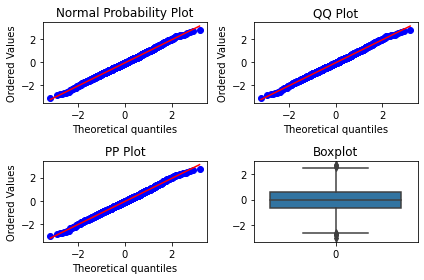

In [781]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot Normal Probability Plot
plt.subplot(2, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Normal Probability Plot")

# Plot QQ Plot
plt.subplot(2, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot")

# Plot PP Plot
plt.subplot(2, 2, 3)
stats.probplot(data, dist="norm", plot=plt, fit=True)
plt.title("PP Plot")

# Plot Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(data)
plt.title("Boxplot")

plt.tight_layout()
plt.show()


In [782]:
import numpy as np
import scipy.stats as stats

# 生成随机数
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# 进行KS检验
ks_statistic, p_value = stats.kstest(data, 'norm')

# 打印结果
print("KS statistic:", ks_statistic)
print("p-value:", p_value)


KS statistic: 0.03737519429804048
p-value: 0.11930823166569182


函数将返回KS统计量和p值。KS统计量表示观察到的数据与指定分布之间的最大差异，p值表示观察到的数据与指定分布一致的概率。

请注意，KS检验假设数据与指定分布完全一致。如果p值小于显著性水平（通常为0.05），则可以拒绝该假设，即数据不服从指定的分布。

原假设是服从，备择假设是不服从